# Introduction to Hypothesis Testing.

### Stephen Elston

### Data Science 350


## Introduction

This note book introduces you to the concepts of clasical hypothesis testing. Specifically, this notebook covers the followig cases:

- Two sample tests for continious variables.
- Two sample tests for categorical or count data.
- Test for distributions.

At the conclusion of this lesson you should be able apply basic clasical hypthesis tests to some common situations. 

![](img/HypothesisCartoon.png)
<center>**Testing a hypothesis**</center>



### Examples of hypothesis tests

What is a practical scenario of using hypothesis tests methods?

- **Identify a hypothesis that can be tested:** Using a larger logo on our web site will drive significantly more trafic.
- **Select a criteria to evaluate the hypothesis:** If our sample has a probability of $>= 90\%$ chance that the increase could be caused by randomness alone we will reject the null hypthesis that the logo does not mater.
- **Select a random sample from the population:** Randomly assign a cookie to new site users that tells the server to show A or B website.
- **Calculate a ststistic** to compare observations to what we expect to observe.



### Hypothesis testing steps

Let's illustrate the use of an hypothesis test with an example.

- We first state our population assumptions in the null hypothesis: $H_0$.
- We state our new alternative hypothesis as an alternative to the null: $H_a$.
- The null + alternative should make up all possible outcomes and be mutually exclusive.
  - $H_0 =$ The old website drives equal amount of traffic.
  - $H_a =$ The old website drives less traffic than the new one.
- Decide on a significance level (probability cutoff): 0.9, 0.95, and 0.99 are common (problem specific).

Based on our findings we can only do two things
- **Reject the null-hypothesis:** Since the alternative covers all other possibilities, we can say we accept the alternative hypothesis.
- **Fail to reject the null hypothesis:**  We accept the null hypothesis because we have already believed our null hypothesis from the start. We can fail for two reasons:
  - The alternative hypothesis was false to begin with.
  - We did not collect enough evidence for the **size of the effect**

### A simple example

Let's try a simple example. We will start by computing the one-sided tail probability of a Normal distribution. In this case we will look at the probability of a the interval from $20.1262055$ to near infinity for a Normal distribution with mean of 15 and standard deviation of 4. Exectue the code in the cell below and examine the result. 

In [21]:
# One tailed probability
def prob_normal(a, b, mean=0, sd=1):
    import scipy.stats as ss
    return(ss.norm.cdf(b, mean, sd) - ss.norm.cdf(a, mean, sd))
prob_normal(20.1262055, 100000000, 15, 4)

0.10000003344026365

The probability of the Normal distribution having a value greater than $20.1262055$ is 0.10. 

You can verify that the probability of the entire distribution is 1.0 by executing the code in the cell below.

In [22]:
prob_normal(-100000000, 100000000, 15, 4)

1.0

**Your Turn:** find the probability of a standard Normal in the following intervals:
- -1 to 1
- -2 to 2
- -3 to 3

What are the approximate probabilites? 

### What does the cutoff mean?

- We know that the average time a user spends on a page has a mean of 15 seconds and a s.d. of 4 seconds.
- If we assume normality, how do we test if a change to the page has a higher view time?
- For example, an event in the blue region will have a 10% chance or less of occurring.

![](img/cutoff.jpg)

**Reject the Null Hypothesis with $90\%$ confidence:** if the mean of the time spent on the new web page is in the blue region. 

The code in the cell below computes the $90\%$ cutoff for a Normal distribution with a mean of 15 and a standard deviation of 4. 

In [23]:
def cutoff_stat(alpha, mean=0, sd=1, one_tailed=True):
    from scipy.stats import norm
    if((alpha > 0.0) & (alpha < 1.0)):
        if(one_tailed):
            return(norm.ppf(1.0 - alpha, loc=mean, scale=sd))
        else:
            return(norm.ppf(1.0 - alpha/2.0, loc=mean, scale=sd))
    else:   
        print('alpha must be btween 0 and 1')
cutoff_stat(0.1, mean = 15.0, sd = 4.0)

20.1262062621784

You can be $90\%$ confident that a value greater than 20.1 is drawn from another population. 

### How many tails do you have?

The above is a one-sided hypothesis test. But, **be careful** as there are other alternatives! Could the new web site be worse? In fact, there are **three possibilities** for which tail(s) used to evalutate the test, as shown in the figure.

![](img/tails2.jpg)

The accept-rejection criteria for the null hypothesis is different in each case.

- One-tail test with value $\gt$ the cutoff.
- One-tail test with value $\lt$ the cutoff.
- Two-tail test with value $\lt\ -cutoff/2$ or $\gt\ cutoff/2$.


### What is  the p-value?

Results of hypothesis tests are often reported as a p-value. You must be careful to correctly interpret the p-value. 

- In technical terms, a p-value is the probability of obtaining an effect **at least as extreme** as the one in your sample data, assuming the null hypothesis is true.
For example, for a vaccine study with a p-value of 0.04, you’d obtain the observed difference or more in 4% of studies due to random sampling error.
**P values address only one question: how likely are your data, assuming a true null hypothesis?** 
- **P value does not measure support for the alternative hypothesis!**


### Misuse of p-values

But, watch out! There are many ways to mis-interpret or misuse p-values.

1. The most common mistake: interpreting a P value as the probability of mistakenly rejecting a true null hypothesis (a **type I error**).
  - P values calculations assume the null hypothesis is true for the population and the difference in the sample is entierly from random chance. **P values can not tell you the probability that the null is true or false!** 
  - For the vaccine study, correct and incorrect way to interpret a P value of 0.04:
    * Correct: If vaccine has no effect,  **the observed difference or more arises solely from random sampling error in 4% of studies.**
    * Incorrect: By rejecting the null hypothesis, there’s a 4% chance of Type 1 error.
2. The second common mistake: you can deduce the probability that the alternative hypotheis is correct (e.g. $1.0 - p$, or a **type II error**).  

## A First Example: t-test

The Student t-test is one of the oldest and most widely used classical hypothesis test. Student’s T-test: tests a hypothesis about the difference of two data samples:
- Test whether a population mean has a specified value.
- Test the difference between two means (equal, unknown variances).
- Test a paired-response difference from zero. E.g. a before/after drug treatment on patients.
- Test whether the slope of a line is not zero.
- Test the importance of variables (later in class).
- Use ‘Welch’s T-test’ for testing the difference between two means (unknown variances, potentially different).
- **Picking the different tests changes test’s results.**
- The more assumptions we make, the easier it is to tell the difference between populations.

### Who was Student?

Student was a pseudonym for William Sealy Gosset. Gosset worked for Guinness Company which forbade employees from publishing work. Gosset published the theory of the t-test in 1908 under his pseudonym.  

![](img/Gosset_1908.jpg)
<center>**William Sealy Gosset in 1908**</center>

![](img/gossett.jpg)

<center>**Plaque at site of Gosset's home**</center>

### Why the t-distribution

The differene in means between two Normal distributions with unknown variance follows a t-distribution. The t-distribution has many nice properties including:

- The t-distribution is the natural distribution for tests on means.
- The t-distribution has heavier tails than the Normal and relaxes assumptions on the differences.


###  A first t-test example

As a first example, compare the means of two Normal distributions. Execute the code in the cell below to compute samples from two Normal distributions with slightly different means.

In [24]:
from scipy.stats import norm
import numpy.random as nr
nr.seed(seed=233423)
pop_A = norm.rvs(loc=150, scale=7, size=25)
pop_B = norm.rvs(loc=153, scale=4, size=35)

The code in the cell below creates histograms of the two populations along with a line for the mean of each population. Execute this code and examine the results.  

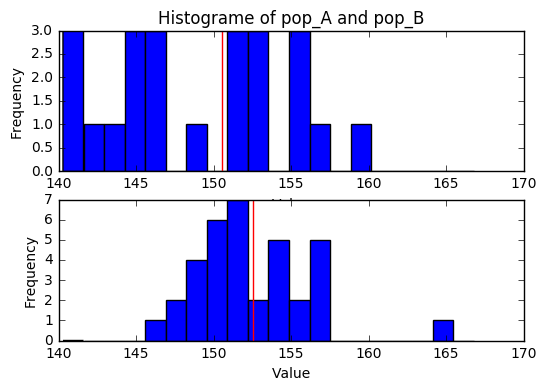

In [25]:
%matplotlib inline
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
def plot_pop(a, b, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_plot(a, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

plot_pop(pop_A, pop_B)    

Notice that the values of the distributions of these populations overlap quite a bit and the means are close. The question is, are these differences significant.  

You can now compute the two-sided t-test to determine if the difference of means is significant. A number of summary statistics are computed and printed for the test. 

The two-sided t-test is used to determine we can reject the null hypthesis that the difference of means is not significant. You can execute the t-test and see the results by executing the code in the cell below.

In [26]:
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   

test = t_test(pop_A, pop_B, 0.05)
test

DegFreedom    32.527186
Difference    -1.975956
Statistic     -1.359749
PValue         0.179172
Low95CI       -5.254211
High95CI       1.302298
dtype: float64

Examine these statistics noticing the following:
1. Difference in means is small.
2. t-statistic is small and the p-value is large. There is a high chance that the difference in means is from random variation alone. 
3. The 95% cofidence interval straddles 0.  

Based at the above statistics we cannot reject the null hypothesis. 

The code in the cell below makes a similar plot to the ones you have already created, but with the the upper and lower confidence bounds shown as dashed lines. Execute this code and examine the results. 

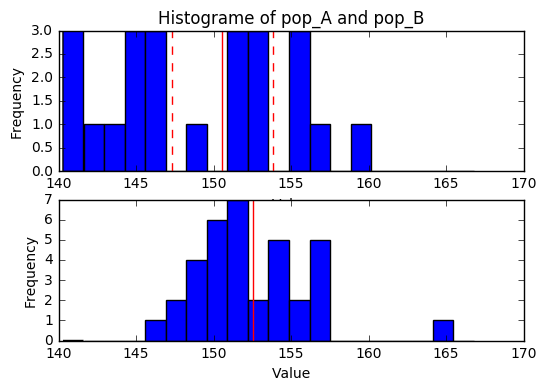

In [27]:
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def plot_t(a, b, t_test, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
plot_t(pop_A, pop_B, test)    

Notice that the mean of the population in the lower plot are within the confidence interval of the difference of means of the population. This confirms that we cannot reject the null hypothesis that there is no significant difference in these means. 

**Your Turn:** In the pervious example the difference of means was not significant. Now, you will repeat this analysis but with a slightly greater difference in means. Create two populations with means (`loc`) of `150` and `155`. Determine if this difference in means is significant using the `t_test` and `plot_t` functions.  

Examine these results and answer the following questions:
1. Based on the t-statistic, p-value, and confidence interval can you reject the null hypothesis? 
2. Does the mean of the second population fall within the confidence interval of the difference of means? 

### Power of Tests

The **power of a test** is formally defined as:

$$power = P(reject\ H_0| when\ H_a\ is\ true)$$

In pain language, the power is the probability of getting a positive result when the null hypothesis is not true. Conversely, a test with insuficient power will not detect a real effect. Clearly, we want the most powerful test we can find for the situation. 

Computing test power can be a bit complex, and analytical solutions can be dificult or impossible. Often, a simulation is used to compute power. 

Let's look at the example of compution power for the two sample t-test for the difference of means. The power of this test depends on the several parameters:

- The number of samples.
- The anticipated difference in the population means, which we call the **effect**.
- The significance level of  the test.
- The type of test.

When running a power test, you can ask several questions, which will assist you in designing an experiement. Usually, you will determine how big a sample you need to have good chance of rejecting the null hypothesis. You can also determine how big an effect needs to be given a fixed sample size (all the samples you have or can afford) to have a good chance of rejecting the null hypothesis. 

The Python `statsmodels` package provides power calculations for a limited set of hypothesis tests. We can use these capabilities to examine the powerr

The code in the cell below does the following:

- Create a sequene of effect sizes.
- Compute a vector of power values for the effect size.
- Plot the effect size vs. power. 

Execute this code and examine the result. 

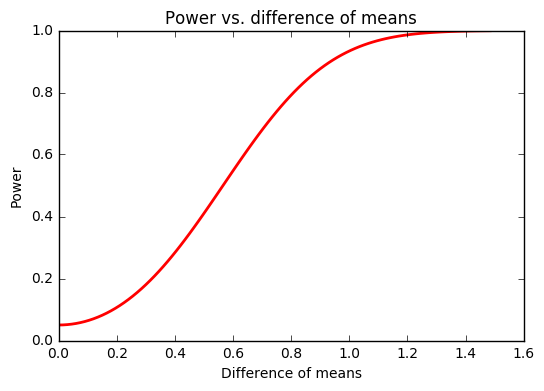

In [28]:
import statsmodels.stats.power as smsp
import numpy as np
nr.seed(seed=23344)
diffs = np.arange(start = 0.0, stop = 1.5, step = .015)
x = 25
powers = [smsp.tt_ind_solve_power(effect_size = x, nobs1 = 25, 
           alpha = 0.05, power = None, ratio = 1.0, alternative = 'two-sided') 
          for x in diffs]

def plot_power(x, y, xlabel, title):
    import matplotlib.pyplot as plt
    plt.plot(x, y, color = 'red', linewidth = 2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Power')
plot_power(diffs, powers, xlabel = 'Difference of means', title = 'Power vs. difference of means')    

Examine these results and notice how the power of the t-test rapidly increases as the difference in means increases. At a relatively small difference in means the power of the test is approaching 1.0, the maximum possible. 

**Your turn:** In the code cell below, compute and plot 100 values of test power for significance levels in the range $\{0.001, 0.25\}$. Set `n = 25`, `d = 1.0`, for the number of samples and the difference in means.
***

Exmine the plot you have created. At a significance level of 0.20 is the power of the t-test approaching 1.0. 

***
**Your turn:** In the code cell below, compute and plot 100 values of test power for sample size in the range $\{1, 100\}$. Set `d = 1.0`, and `sig.level = 0.05`, for the difference in means and the significance level.
***

Examine the plot you have created. The power of the t-test at 20 samples is approximately what value?

### Tests on Gaulton's height data (1886)

Francis Gaulton published his seminal paper on the theory of regression in 1886. This paper has been enourmously infulential in statistics, as the linear regression model is still used today; in a different form from Gaulton's approach. 

Gaulton showed that the hights of members of a family 'regress to the mean', and that the height of the parents does not determine the hights of their adult childern. In this exercise, we will take a different approach to analyzing these data. We will use the t-test to compare the difference in means of the hights of parents and their adult childern. 

As a first step, load the data from the .csv file provided and have a look at the first few rows of the data frame by executing the code in the cell bellow. 

In [29]:
import pandas as pd
GaltonFamilies = pd.read_csv('GaltonFamilies.csv')
GaltonFamilies.head(10)

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5
5,002,75.5,66.5,73.66,4,2,male,72.5
6,002,75.5,66.5,73.66,4,3,female,65.5
7,002,75.5,66.5,73.66,4,4,female,65.5
8,003,75.0,64.0,72.06,2,1,male,71.0
9,003,75.0,64.0,72.06,2,2,female,68.0


This data set has 9 columns:
 1. A case or row number.
 2. A unique code for each family in the sample.
 3. The height of the father in inches.
 4. The height of the mother in inches.
 5. The average height of the parents.
 6. The number of childern in the family.
 7. A code for the each unique child in the family.
 8. The gender of the child.
 9. The height of the adult child in inches. 
 
 To analyze these data we divide them into two groups based on the gender of the adult childern. The code in the cell below divides the data set, plots two histograms to compare the hights of the two samples and performs two-sided the t-test on difference of the means of these samples. 

DegFreedom     9.298860e+02
Difference     5.130122e+00
Statistic      3.137518e+01
PValue        4.681854e-148
Low95CI        4.810266e+00
High95CI       5.449979e+00
dtype: float64


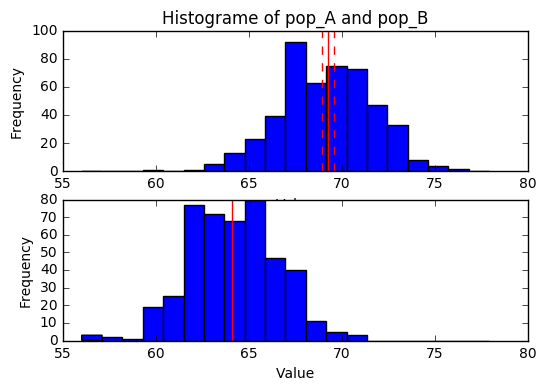

In [30]:
male = GaltonFamilies.loc[GaltonFamilies.loc[:, 'gender'] == 'male', 'childHeight']
female = GaltonFamilies.loc[GaltonFamilies.loc[:, 'gender'] == 'female', 'childHeight']

test_Galton = t_test(male, female, alpha = 0.05)
print(test_Galton)
plot_t(male, female, test_Galton)   

Examine these results noticing the following:
1. The t-statistic is large, the p-value is small and the confidence interval of the difference of the means does not overlap zero. We can reject the null hypothesis that the means are the same. There is a low chance that the difference in means is from random variation alone.
2. The mean of the second sample falls outside the confidence interval, confirming that there is a low chance that the difference in means is from random variation alone.

**Your Turn:** Compute the t-statistics and plot the histograms for the difference in means of the fathers and their adult sons. It could be the case that childern are taller than their parents. To test this idea, use the `alternative = 'larger'` argumennt of the `t_test` function. Using this argument defines a **one-sided t-test**.

Examine your results and anwer the following questions. 
1. For the one-sided test, the what is the upper bound on the confidence interval? 
2. Given the value of the t-statistic, the p-value and the confidence interval can you reject the null hypthesis? 

### Paired t-tests

There is also a version of the t-test for paired data. The heights of mothers and their adult sons is an example of paired data, since each son has a specific mother. Clasically, paired tests are used to compare data from before and after a medical treatment.

Sometimes the paired t-test is referred to as the dependent t-test. The null hypothesis is that there is no change between after the treatment. 

Execute the code in the cell below and  examine the results.

DegFreedom     9.459687e+02
Difference     5.200832e+00
Statistic      3.949802e+01
PValue        6.323181e-153
Low95CI        4.887331e+00
High95CI       5.514333e+00
dtype: float64


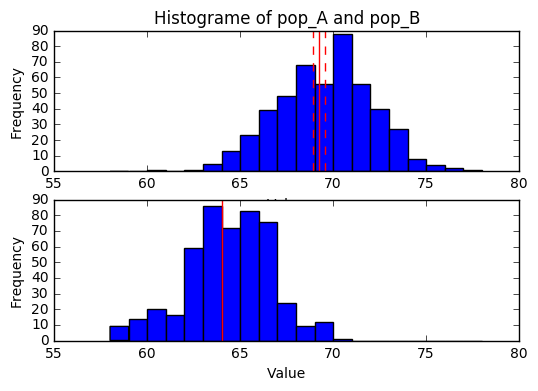

In [31]:
## Welche's test for paired data
def t_test_paired(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = np.mean([x - y for x,y in zip(a,b)])
    res = ss.ttest_rel(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   
mother = GaltonFamilies.loc[GaltonFamilies.loc[:, 'gender'] == 'male', 'mother']
Galton_paired = t_test_paired(male, mother, alpha = 0.05)
print(Galton_paired)
plot_t(male, mother, Galton_paired) 

***
**Your turn:** You have seen that we cannot reject the null hypothesis for a difference in means of the fathers and their sons, which was only about `0.1`. It could be that this is an issue with test power. 

In the code cell below use the `pwr.t2n.test` function to plot 100 values of the difference in means in the range $\{0.0, 1.0 \}$. The sample size arguments to this function are `n1 and n2`, and the `sig.level - 0.05`. 

Execute your code and examine the results. How big should the difference be to have a power or 0.9? 
***

Examine your plot. With a difference in means of 0.3 approximately what is the power of the test? 

## Tests for Categorical Data

So far, we have been investigating tests for data with continious values. But, many data types are categorical where we work with count statistics. What tests can we apply to these?

### Pearson's Chi-Squared Test

One of the earliest tests for count data was developed by Karl Pearson around 1900. Dispite its age, this test is still used today. The Pearson Chi-squared test (also written as $\chi$-squared) has the following properties:

- It is an unpaired test for counts in different categories.
  - These categories must be mutually exclusive. For example, does the patient have cancer? (yes/no)
  - Test if the two categories differ in WBC count.
  - Rolling a die. (1,2,3,4,5,6)
  - Test if the six categories occur the same (fair die).
  - Does a tweet contain a specific word? (yes/no)
  - test if the two categories differ in tweet length or word count.
- Tests if different categories differ in some specific value.
- The Chi-squared statistic depends on the ‘degrees of freedom’ of the test.
  - This is equal to n-1.  Where n equals the number of different categories.
- The test looks at the sum of the outcome differences from expectations.
- Chi-squared is also used for a ‘goodness of fit’ test. Test if sample is representative of population.
  - Test if your sample has expected make up of categories.
  - For example, if our population is 50-50 men-women, then we test if our sample is different from those expected probabilities.

The density of the $\chi$-squared distribution depends on the degrees of freedom.

![](img/Chi-square.png)

As with any probability density function, confidence intervals and p-values can be computed. Notice that the $\chi$-squared distribution becomes flatter and with greater dispursion as the degrees of freedom increase. In practice, this means that you will need large samples to get a meaningful result if you have too many choices in your test. 

### Karl Pearson

Karl Pearson was the dean of late 19th and early 20th century mathematical statisticians. Pearson was a student of Frances Gaulton, the inventor of the regression method. Willam Sealy Gossett was one of Pearsons's students. This realationship is said to be the insparation for Gossett's pseudonym 'Student'. 

![Karl Pearson in 1912: A scary looking statistics professor](img/Karl_Pearson_1912.jpg) 

<center>**Karl Pearson in 1912:** A scary looking statistics professor!</center>

In many ways Pearson's infuluence on the mathematical foundations of statistics is still with us more than a century latter. Most unfortunately, Pearson was also a eugenicist and a raceist. His misuse of statistics in this area tarnished his legacy.

### Building a Chi-squared table

The traditional way to apply a Chi-squared test is to first create a Chi-squared table. In this example we are looking the results of an A-B test with three possible outcomes. For example, this type of test might be applied to determine if a new web site drives more customer purchases. 

the code in the cell below builds a simple Chi-squared table. The columns in the data frame are:

- The actual occurance of events.
- The expected probability of these events. This is the distribution of the null hypothesis.
- The expected occurance of events given the expected probabilities.
- The difference between the occurance and the expected number of events.
- The square of the difference.
- The squared difference normalized by the expected number of occurances. The sum of these figures in the Chi-squared statistic. 

Execute the code and examine the results. 

In [32]:
import pandas as pd
ab_data = pd.DataFrame({'Action':['Leave Page', 'Continue Purchase', 'Add More to Purchase'],
                       'occurrence':[55,43,22],
                       'expected_per':[0.6,0.3,0.1]})
sum_occurrence = ab_data.loc[:, 'occurrence'].sum()
ab_data.loc[:, 'expected_occurance'] = sum_occurrence * ab_data.loc[:, 'expected_per']
ab_data.loc[:, 'diff'] = ab_data.loc[:, 'occurrence'] - ab_data.loc[:, 'expected_occurance'] 
ab_data.loc[:, 'sqr_diff'] = ab_data.loc[:, 'diff'].apply(lambda x: x**2)
ab_data.loc[:, 'diff_expect'] = ab_data.loc[:, 'sqr_diff'].div(ab_data.loc[:, 'expected_occurance'], axis='index')
ab_data = ab_data.append({'Action': 'Totals',
                      'occurrence': sum_occurrence,
                       'expected_per':  [np.nan],
                      'expected_occurance': [np.nan],
                      'diff': [np.nan],
                      'sqr_diff': [np.nan],
                      'diff_expect': ab_data.loc[:, 'diff_expect'].sum()}, 
                        ignore_index =  True)
ab_data = ab_data[['Action', 'occurrence', 'expected_per', 'expected_occurance', 'diff', 'sqr_diff', 'diff_expect']]
ab_data                                       

,Action,occurrence,expected_per,expected_occurance,diff,sqr_diff,diff_expect
0,Leave Page,55,0.6,72,-17,289,4.013889
1,Continue Purchase,43,0.3,36,7,49,1.361111
2,Add More to Purchase,22,0.1,12,10,100,8.333333
3,Totals,120,[nan],[nan],[nan],[nan],13.708333


This Chi-squared table is interpreted as follows:

- The $\chi$-squared test statistic is 13.708, which is computed as the sum of the squared differences normalized by the expected occurances.
- The $\chi$-squared distribution has (3 Outcomes - 1) = 2 degrees of freedom.
- Degree of freedom is the number of outcome options (3) minus 1.

Run the  code in the cell below to compute the p-value of the chi-squared test with the `scipy.stata.chi2.cdf` function.

In [33]:
import scipy.stats as ss
1 - ss.chi2.cdf(13.7, df = 2)

0.0010594556929076626

This p-value is rather small. Evidently, there is a small chance that the  differences between the occuranaces and expected occurances are from random variation alone. 

In the foregoing example we computed the Chi-squareed statistic and p-value directly. In general, this is a somewhat cumbersom approach. Instead, we can use the `chisquare` function from the `scipy.stats` package as shown in the code below. Execute this code and examine the results. 

In [34]:
chisq, pvalue = ss.chisquare(ab_data.loc[:, 'occurrence'][:3], 
             ab_data.loc[:, 'expected_occurance'][:3])
print('Chi Squared statistic = ' + str(chisq))
print('P=value = ' + str(pvalue))

Chi Squared statistic = 13.708333333333334
P=value = 0.00105505047809


The difference between the expected and observed number of occurances is significant. The large Chi-squared value on 2 degrees of freedom and the small p-value indicate we can reject the null hypothesis that the observed occurances follow the same distribution as the expected occurances. There is a low chance that this difference occurs from random variation alone. 

Finally, we should check the power of our test. Execute the code in the cell below and examine the results. In this case, we will use the `power_divergence` function from the `scipy.stats` package. Execute this code to determine if this test has reasonable power.

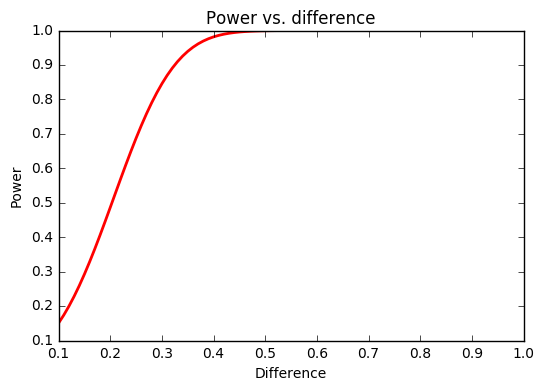

In [35]:
import statsmodels.stats.power as ssp
diffs = np.arange(start = 0.1, stop = 1.0, step = 0.01) 
powers = ssp.GofChisquarePower().solve_power(effect_size = diffs, nobs=120, n_bins = 3, alpha=0.05)
plot_power(diffs, powers, xlabel = 'Difference', title = 'Power vs. difference') 

Apparently, this test is quite powerful, and we could have detected much smaller differencecs between the observed and expected counts. 

**Your Turn!** As you have observed, the test is quite powerful with 120 observations. But, what if we do not have a smaple this large. Compute and plot the power of the Chi-squared test for an effect size of 1.0 at sample sizes in the range $\{ 10, 100\}$. The `nobs` argument to the `GofChisquarePower` is the sample size. 

Examine your results. At a sample size of 30 is the power of the test approximately 1.0? 

### Fisher's Exact Test

The assumptions behind the Chi-squared statistic breakdown when the sample size is small (e.g. number of occurances $\le 10$). In this case you can use Fisher's Exact Test. In practice Fisher's exact test is rarely used, but it is interesting  to think about it anyway. 

According to the story, in 1911 Ronald Fisher worked in the same institutioin with a talented aquatic botanist, Dr. Muriel Bristol, who was quite particular about how her tea was served. Dr. Bristol told Fisher that she could tell the difference between cups of tea where the milk had been poured into the cup before or after the tea was poured. 

![](img/Bristol.png)
<center>**Dr Murel Bristol**, noted algal botanist, and quite particular about her tea.

Fisher, was a bit skeptical. He challenged Dr. Britol to a test. In the test Fisher prepared eight cups of tea. Four of the cups of where prepared in Dr. Bristol's prefered manner and the other four the other way. The tea was prepare out of sight of Dr. Bristol. However, she knew that there were four cups prepared each way. The order of preparation of each cup of tea was randomized. Fisher served the cups of tea to Dr. Bristol and asked her how the tea had been poured. In every case, she was correct!

Fisher devised a **purmutation test** to determine the likelihood that Dr Bristol could have simiply guessed the correct outcome. He devised the following purmuation table for the chances of success:

![](img/tea.png)

The possible purmuations of possible ways that Dr Bristol could have correctly (sucess) or incorrectly identified the way each cup of tea was prepared:

$$\frac{8!}{4!(8-4)!} = 70$$

So, the chance that the Dr Bristol could purely guess (by random chance) the outcome is only 1 in 70 or about 1.4%. 

Let's try an example of Fisher's exact test. Take a simple 2X2 matrix of counts. The counts are number of success and failures for two samples (two sets of Bernoulli trails), on the number of sharks observed in two oceans overe some period of time. Run the code in the cell below to apply the Fisher exact test to these counts.  

In [36]:
mat_test = pd.DataFrame(np.array([[8,2],[1,5]]),
                       index = ['wales', 'sharks'],
                       columns = ['Atlantic', 'Indian'])
print(mat_test)
oddsratio, pvalue = ss.fisher_exact(mat_test)
print('\nOddsratio = ' + str(oddsratio))
print('P-value = ' + str(pvalue))

        Atlantic  Indian
wales          8       2
sharks         1       5

Oddsratio = 20.0
P-value = 0.034965034965


In this case, we can reject the null hypothesis. Evidently the difference of counts of wales and sharks in the two oceans from this experiment is unlikely to arrise by chance alone. 

## Hypothesis Testing Summary

- If data is normal:
  - If you know population mean and variance, use standard normal ‘z-test’.
  - If you just know population mean, use t-test.
  - If you don't know the mean and variance, use Welch’s t-test.
  - Tests for paired and unpaired data.
- For categorical comparison tests,
  - If the sample/subgroup size is large enough, use Chi-squared test
  - If the sample/subgroup size is small, use Fisher’s Exact test.


## Testing distributions

Test statistics, and other statistics, often make distribution assumptions. This raises the question, how can we test a distribution assumption. To answer this question we will now look at both graphical and  formal tests. Since in most cases, distribution assumptions are approximate, simple graphical methods are often sufficient.   

### An example with Q-Q plot

The qualtile-quantile (Q-Q) plot provides a handy visual means to inspect the similarity of distributions of a data set. The general idea is to plot the quantiles of the sample on the vertical axis and the quantiles of the thoretical distribution on the horizontal axis. If the points of the plot fall on an approximately straight line, you can conclude that the sample distribution is close to the thoretical. 

The Normal Q-Q plot, plots the quantiles of a standard Normal distribution on the horizontal axis and the quantiles of the data sample on the vertical axis. If the sample is Normal the data points will fall in a straight line. 

Execute the code in the cell below to compute two samples from a Normal distribution.

In [37]:
import numpy.random as nr
nr.seed(1357)
norm1 = nr.normal(size = 100).tolist()
norm2 = nr.normal(size = 100).tolist()

Run the code in the cell below to create Q-Q plots of the two samples, and examine the results.

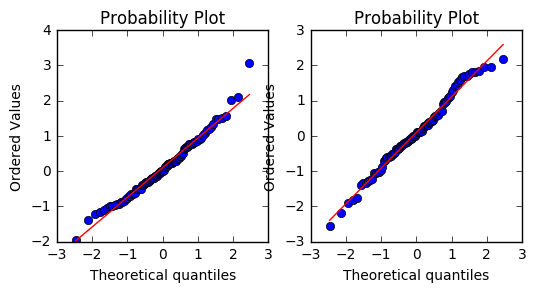

In [38]:
def qq_plot(vec1, vec2):
    import matplotlib.pyplot as plt
    import scipy.stats as ss
    plt.figure(figsize=(6, 6)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
qq_plot(norm1, norm2)    

The line of points on both Q-Q plots is close to straight, showing the not suprising result given that both samples are realizations of Normal distributions.

You can also test if two samples have similar distributions using the same plot. Run the code in the cell below and examine the result. 

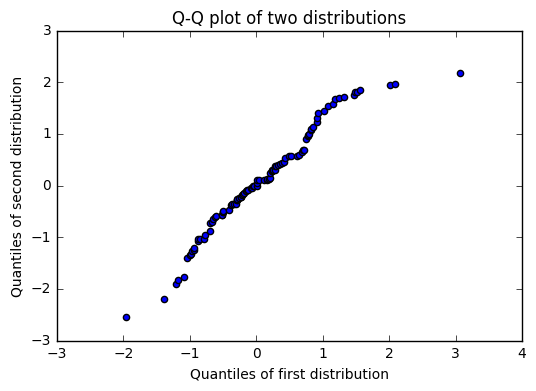

In [39]:
import matplotlib.pyplot as plt
plt.scatter(x = sorted(norm1), y = sorted(norm2))
plt.xlabel('Quantiles of first distribution')
plt.ylabel('Quantiles of second distribution')
plt.title('Q-Q plot of two distributions')

Again, not suprisingly, the points line close to a straight line. The noticeable deviations are a result of the small sample size. 

### The Kolmogorov-Smirnov test for distributions

The Kolmogorov-Smirnov test is a general test of the distribution of a sample. The K-S statistic is just the maximum vertical distance between CDF of the sample and the CDF of the theortical distribution. Since it is based on a simple deviatiion the K-S test can test departure from any hypothetical distribution, not just normal. As you should expect, the trade-off for this generality is that the K-S test does not have particularly high power. There are numerious distribution-specific tests with greater power, but will will not discuss those in this lesson. 

As a first step in investigating the Kolmogorov-Smirnov test plot the cumulative distribution functions of the two samples by executing the code in the cell below.

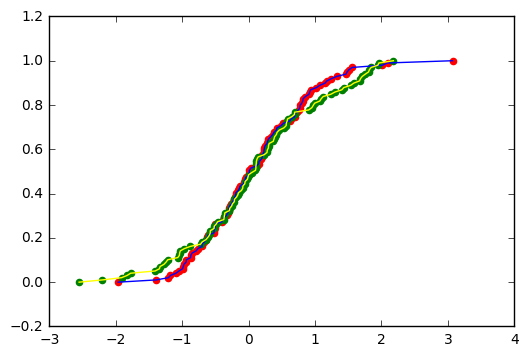

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plot_cums(dist1, dist2):
    ## sort the first data sample:
    data_sorted = np.sort(dist1)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(dist1)) / (len(dist1) - 1)

    # Now plot as line and scatter plot. 
    plt.plot(data_sorted, p)
    plt.scatter(data_sorted, p, color = 'red')
    
    # sort the seond data sample:
    data_sorted = np.sort(dist2)
    
    # And the second plot
    plt.plot(data_sorted, p, color = 'yellow')
    plt.scatter(data_sorted, p, color = 'green')

plot_cums(norm1, norm2)    

Notice that, as you might expect, the two cumulative density function are quite similar. Even with data sampled from the same theoritical distribution, you can see there is deviation between the cumulative distribution functions. The question is, are these deviations significant? 

The **K-S statistic is the maximum vertical difference** between the two cumulative density functions. Based on this distance and the number of samples, the p-value for the K-S test is computed.  

Next, let's look at the affect of normalization or standardization of the samples for the K-S test.  It is important that the **samples must be standardized** before applying the Kolmogorov-Smirnov test. Execute the code in the cell below to compute and plot the cumulative density function of Normal distibutions with different location (mean) and scale (standard deviation) parameters.

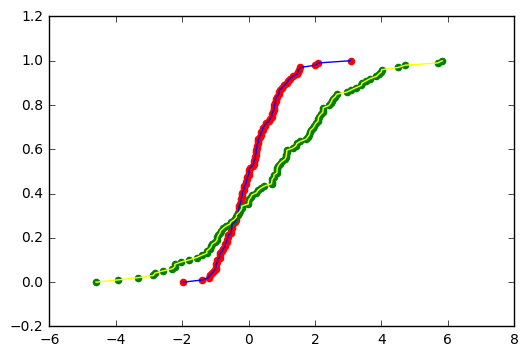

In [41]:
nr.seed(155)
norm3 = nr.normal(loc = 1, scale = 2.0, size = 100).tolist()
plot_cums(norm1, norm3)   

Examine the plot. You can see that there are significant deviations between the two cumulative distribution functions. This result indicates that the two samples are drawn from different distributions. 

Now, execute the code in the cell below to standardize (zero mean, unit standard deviation) the two samples and plot the cumulative distribution function. 

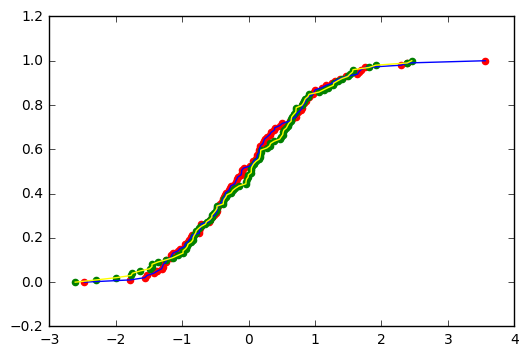

In [42]:
from sklearn.preprocessing import scale
norm1_s = scale(norm1)
norm3_s = scale(norm3)
plot_cums(norm1_s, norm3_s)  

Notice that the cumulative density plots of the standardized data are quite similar. This indicates the two samples are drawn from the same distribution. 

Next, you will compute the **K-S statistic, maximum vertical distance between the two cumulative density functions**, and the **p-value or probability that this difference arrises from chance alone**. The code below uses the `kstest` function from the `scipy.stats` package. Execute this code. 

In [43]:
def ks_test(dat, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic = ' + str(ks_statisic))
    print('P-value = ' + str(pvalue))
ks_test(norm1_s)    

KS-statistic = 0.0553336816403
P-value = 0.91942626432


The K-S statistic is quite small and the p-value is large. The chance that we cannot reject the null hypothesis since the probability that the difference arrises by chance alone is high. 

Next, let's see how the KS-test works for two quite different distributions, the Normal and Uniform. The code is the cell below computes the KS-statistics to test the Normality of a Uniform distribution. Execute this code and examine the results. Do these results appear as you expect?

In [44]:
unif = nr.uniform(size = 100).tolist()
ks_test(unif) 

KS-statistic = 0.501720146535
P-value = 0.0


In this case, the K-S statistic is large and the p-value quite small. We can reject the null hypothesis that these distributions are the same, and the chance of this difference of arrising from random variation alone is quite small.

Now, we and test if the samples drawn from the Uniform distribution are consistent with the theoretical Uniform distribution. Execute the code in the cell below and examine the results. 

In [45]:
ks_test(unif, 'uniform') 

KS-statistic = 0.0717739772379
P-value = 0.681193620964


In this case, we cannot reject the null hypothesis that these disributions are different. The K-S statistic is small and the p-value is large.  

The K-S test is rather general, as it can be applied to test any distribution. However, this means that the **power** of this test is limited. The power of a test is the probability of rejecting a null hypothesis when the alternative is true. 

As is always the case with clasical statistics, a more powerful test can be created by adopting more restrictive assuptions. For example, the Shapiro-Wilk test has greater power, but is specifically for Normal distributions. 

## Testing Multiple Groups and ANOVA

So far, we have only looked at tests for comparing two samples. What if we have multiple groups and we wanted to compare their means? Why can’t we just do multiple two-sample t-tests for all pairs?
- Results in increased probability of accepting a false hypothesis.
- E.g., if we had 7 groups, there would be (7 Choose 2)=21 pairs to test.  If our alpha cutoff is 5%, then we are likely to accept about 1 false hypothesis (approximately 21*0.05).

There is another alternative:

- Null Hypothesis: All groups are samples from the same population.
- Alternative Hypothesis: At least one group has a statistically different mean.

This type of analysis is called “ANalysis Of VAriance”, or ANOVA. ANOVA is one of a large family of models used for **experimental design**.

### History of ANOVA

ANOVA is not a new idea. 

- Laplace pioneered multiple comparison methods in 1827.
- Ronald A Fisher published seminal work inn 1922, 1925 and 1935. The F (Fisher) statistic is named in his honor.

![](img/Ronald_Fisher.jpg)
<center>**Ronald A. Fiher**, another scary looking statistics professor!</center>
<center>By Flikr commons [CC BY 2.0 (http://creativecommons.org/licenses/by/2.0)], via Wikimedia Commons</center>   

Fisher pionered the use of linear models for testing multiple groups (ANOVA) and the design of experiments to ensure meaningful analysis. Fisher had an overwhelming influence on the theory of classical (frequentist) statistics. He was vehemently opposed to Baysian methods, and ostracized any practitioners. In fact, Fisher's long shadow explains why we are only begining to teach Bayesian methods in the 21st century. Unfortunately, as with Pearson, Fisher was also a eugenicist and a raceist.

Fisher's two books are still infulential and in print. 

![](img/Fisher1.jpg)

![](img/Fisher2.jpg)

<center>**Fisher's books of 1935 and 1925**</center>


### Basic ANOVA Theory 

Let's have a look at how we would perform the comparisons between the multiple groups of data. First, make data independence and Normality assumptions about the groups. Then define:

$$ I = number\ of\ treatments\\
n = number\ of\ data\ or\ samples\\
SS = sum\ of\ squares$$

We can calulate the following quantities:

$$SST = SS\ Treatment\\
SSE = SS\ Error\ within\ groups\\
SS- SSTotal = SST + SSE$$

Further, 

$$ DFT = degrees\ of\ freedom\ Treatment\\
DFE = degrees\ of\ freedom\ Error\ within\ groups\\
DFTotoal = DFT + DFE = (I-1) + (n-I) = n -1$$

And,

$$MST = mean\ square\ error\ Treatment\\
MSE = mean\ square\ error\ within\ groups$$

Finally we can compute the F ststistic with $I-1$ degrees of freedom:

$$F = \frac{Variance\ between\ treatments}{Variance\ within\ treatments} = \frac{MST}{MSE} =  \frac{\frac{SST}{DFT}}{\frac{SSE}{DFE}}$$

The F statistic on the degrees of freedom determines the significance or p-values of the test. We can lay these results out in an ANOVA table as follows:

|Type|Sum of Squares|df|Mean Square E|F|Significance|
|---|---|---|---|---|---|
|Between Groups|SST|DFT|SST/DFT|F Statistic| p-value|
|Within Groups|SSE|DFE|SSE/DFE|||
|Groups Total|SSTotal|DFTotal||||


### ANOVA Example

Let's start with an example with 4 groups. In Fisher's experimental design terminology we say we have data from 4 **treatments**. Run the code below and examine the difference in the box plots.

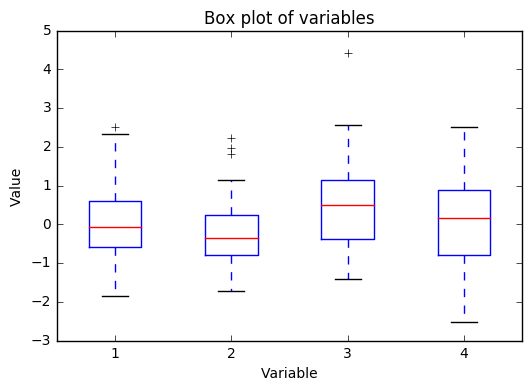

In [46]:
nr.seed(335566)
df1 = nr.normal(size = 50).tolist()
df2 = nr.normal(size = 50).tolist()
df3 = nr.normal(loc = 0.5, size = 60).tolist()
df4 = nr.normal(size = 40).tolist()

import matplotlib.pyplot as plt
plt.boxplot([df1, df2, df3, df4])
plt.ylabel('Value')
plt.xlabel('Variable')
plt.title('Box plot of variables')

The plot shows variation between the distributions of the four variables. The question is, are these differences significant. 

The code in the cell below applies the R `f_oneway` function, from the `scipy.stats` package, to the data. The `f_oneway` function computes an F-Statistic and a p-value. 

The code in the cell below models the anova of the values by groups and prints the results of the model. Run this code and examine the results. 

In [47]:
f_statistic, p_value = ss.f_oneway(df1, df2, df3, df4)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 4.77028168828
P-value = 0.00312030592076


The F-Statistic is fairly large and the p-value is small. We can reject the null hypothesis that the 4 variables have the same mean, as the probability of the differences arrising from random chance is quite low. 

There is also the question of the power of this ANOVA test. In other words, what is the probability that we will detect a difference in means? 

The code in the cell below uses the `FTestAnovaPower.solve_power` function from the `statsmodels.stats.power` package. Power is computed for mean differences in the range $\{ 0.1, 1.0 \}$ and ploted against the mean difference. To be conservative, we are using the smallest number of samples for the varibles as the number of observations, `nobs`. Execute this code.

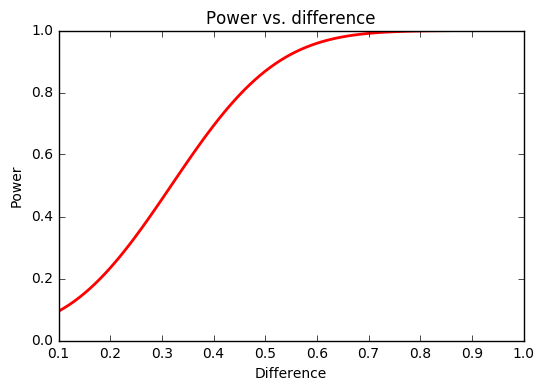

In [48]:
import statsmodels.stats.power as ssp
diffs = np.arange(start = 0.1, stop = 1.0, step = 0.01) 
powers = ssp.FTestAnovaPower().solve_power(effect_size = diffs, nobs=40, alpha=0.05)
plot_power(diffs, powers, xlabel = 'Difference', title = 'Power vs. difference') 

You can see that even with 40 observations, the probability of detecting a farily small difference in means between the groups is quite high. 

**Your turn:** In a hypothetical example, after one month on the job, a new manager at an auto dealership observes changes in the average daily total sales by day of the week. She wants to know if these differencesare significant or just from random variation?

To solve the problem you will do the following:
1. Execute the code in the cell provided below to compute some simulated data values by day of the week an display a box plot. The parameters for the Normal distributions for each day of the week are based on the average sales for each day and the standard deviation of sales over the month. 
2. In the next cell compute and display the F-Statistic and p-value for this sample. 
3. Compute the power of this test with the  following parameters:
  - Range of differences from 1.0 to 10 in steps of 0.1. 
  - To display the plot of power vs. dollars, you must scale these differences by 10,000, the scale of the Normal distribution. Do this after you have computed the power values. This process is necessiary since the manager will want to see the results in units she understands, dollars. 

Eamine the results of you analysis and answer the following questions:
1. Is the difference between the sales on the different days statistically significant at the 95% level? 
2. For a price difference of \$60,000 what is the approximate power of this test? 

### Turkey's ANOVA: Telling Groups Apart

From the above ANOVA results we know that there is some difference in the means of these variables. However, the ANOVA does not tell us which variable is significantly different. From the box plot, we could guess it that group 3 is different, but we really don't know.

John Tukey proposed a test, which he dubbed the HSD, or Honest Significanat Differences, test. The test exaustively computes the following for each pair of groups:
- Difference of the means
- Confidence interval of the difference in the means
- A p-value from the distribution of the differences

These results are laid out in a table or can be plotted graphically. Only differences in means with a confidence interval not overlapping zero are considered significant.

The cells below contain the code to compute the Tukey HSD for the example. The code uses the `pairwise_tukeyhsd` function from the `statsmodels.stats.multicomp` package. Run this code and examine the results to determine which differences are significant?

In [49]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df = pd.DataFrame({'vals': df1 + df2 + df3 + df4,
                   'group_num': ['1'] * 50 + ['2'] * 50 + ['3'] * 60 + ['4'] * 40})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2    -0.3237  -0.8799 0.2325 False 
  1      3     0.4386  -0.0939 0.9711 False 
  1      4     -0.04   -0.6299 0.5499 False 
  2      3     0.7623   0.2298 1.2948  True 
  2      4     0.2837  -0.3062 0.8736 False 
  3      4    -0.4786  -1.0463 0.089  False 
--------------------------------------------


Examine the table above. If the difference in means between the variables is significant, the confidence interval will not include 0. Which, pairs have a significant difference at the 95% confidence level? You can see the results of this test in the left most column of the table. 

The `plot_simultaneous` method for a `pairwise_tukeyhsd` object allows you to create a plot of the test results. Plot these figures and examine the results.

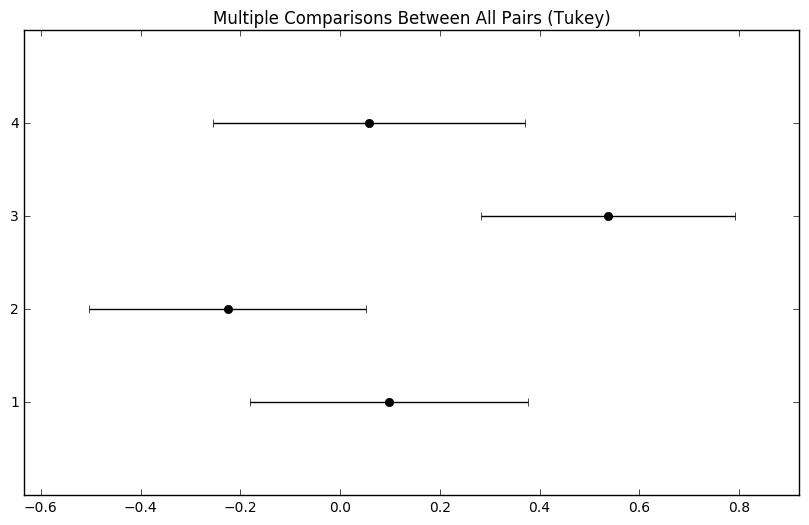

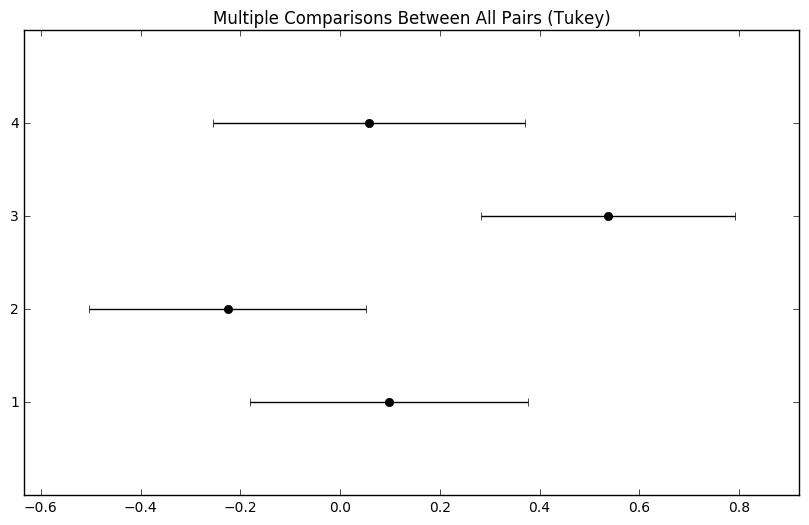

In [50]:
Tukey_HSD.plot_simultaneous()

Examine the plot above. There is a line with a dot shown for each variable. The dot is the mean and the line shows the range of the confidence interval for  that mean. If the difference in means is significant at the confidence level, the confidence intervals will not overlap. Which, pairs in the above plot have a significant difference at the 95% confidence level?

**Your turn:** It would be useful for the manager of the auto dealership understand which days of the week have significantly different average sales at the 95% confidence level. To solve this problem do the following:
1. Compute and print the results of the Tukey HSD test using the `pairwise_tukeyhsd` function. To do so, you will need to first create a list of sales data by concatenating the sales by day of the week using the `numpy.concatenate` function, and then apply the `flatten` method. Since these values are Numpy arrays you cannot use the `+` operator for concatenation. You will also need a list of days of the week, which can be created using the normal multiplication, `*`, and concatenation, `+` operators. 
2. Use the `plot_simultneous` method on your model object to display the confidence intervals of the means. 

Which four pairs days of the week are statistically different at the 95% confidence level? 

## Clasical Tests and Big Data

With the increasing scale of data sets in the 21st Century, problems with the correct applicaton of classical tests have been amplified. The primary issue is with false positives, or **Type I errors**. This problem is known as the problem of **multiple comparisons** or **base rate fallacy**. 

To understand this problem lets look at a simple example. If we have 7 groups, there are 21 possible interactions between the groups. If we use a t-test with a significance level of 0.05, we expect there to be one false positive, even if the null hypothesis is true in all cases. 

These problems grow as the number of groups grow. As an example, consider classifing several millions objects from images. 

When there are relatively few groups with a great many cases there is no problem. The test will have ample power.

With large numbers of groups, there is a high probability of getting a false positive, or type I error, with ANOVA. Without any way to know which groups are different, it is nearly impossible to determine which group may or may not be different from the rest of the population. This is a manifestation of the base rate fallacy. 

### Bonfirroni correction  

Several adjustments to the multiple comparisons problem have been proposed. In 1979 Holm published a method know as the **Bonfirroni correction**. The adjustment is simple:

$$\alpha_b = \frac{\alpha}{m}\\
with\\ 
m =\ number\ of\ groups$$

The problem with the Bonfirroni correction is the reduction in power as the  grows smaller. For big data problems with large numbers of groups, this issue can be especially serious. 

### Confidence and credible intervals

Another approach to the base rate falacy problem is to use **confidence intervals**. For example, one can compute the confidence intervals of the distributions of differences of means between groups. We have just seen an example with Tukeys HSD method. 

Interpretation of confidence intervals is quite straight forward, especailly when compared to p-values. If the confidence intervals for the difference in means do not overlap 0 the difference in means is significant. 

The confidence intervals can be adjusted analogously to the Bonfirroni correction. This process does not have the problem with the reduction in power.   

Yet another approach is to use the Bayesian **credible interval**. While the computation is different, the intrepretation is intuitive, and analogous to interpretation of confidence intervals. 

## Summary

We have covered lot of ground in this lesson. Specifically we have discussed:

- Mean comparison tests in the form of the t-test. In this case, the null hypothesis is that there is no significant difference in means and the samples are from the same popuolation.  
- The $\chi$-squared test for count data. The null hypothesis is that there is no significant differences in the countsand the samples are from the same popuolation. 
- Distribution comparison tests in the form of the K-S test. The null hypothesis is that the two distributions are the same. 
- Variance comparison test for multiple grouped in the form of ANOVA. The null hypothesis is that there are no differences in the variances of the samples and they are all from the same population. 
- The meaning of the p-value or significance level. A p-value is the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the null hypothesis is true.
- Power of tests. The power of a test is the probability of getting a positive result when the null hypothesis is not true. 
- Multiple compairison issues with applying tests to big data problems. 

## Suplementary Material

If you need some review of the concepts of classical statistics there are numerous good books available. Two particuarly non-mathematical and readable books are shown below. These books have distinct and diferent styles. If you do not like one, you might like the other. Or, you may benefit from reading both. 

Alex Reinhart's book, *Statistics Done Wrong, a woefully complete guide*, No Starch Press, 2015, disscusses clasical statistical tests using numerious clever examples. 

![](img/StatsDoneWrong.jpg)

Andrew Vicker's *What is a P-Value Anyway*, Pearson, 2009, is perhaps the most humorous statistics book ever writen; admittidly a category with little competition. The treatment is a bit broader than Reinhart's book. 

![](img/p-value.jpg)
